### Part I-B:

For the analysis below, use Data I-B. 

0. You can also use Data I-B along with Data I-A if required. Also, perform the analysis only for the duration 2014-15. 

1. Filter out the union territories (Delhi, Chandigarh, Andaman and Nicobar Islands, etc.) for further analysis, as they are governed directly by the centre, not state governments.

2. Plot the GDP per capita for all the states.

3. Identify the top 5 and the bottom 5 states based on the GDP per capita.

4. Find the ratio of the highest per capita GDP to the lowest per capita GDP.

5. Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

6. Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.

Note: Categorisation into four groups will simplify the subsequent analysis, as otherwise, comparing the data of all the states would become quite exhaustive.

For each category (C1, C2, C3, C4):

7. Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.

8. Note-I: The nomenclature for this project is as follows: primary, secondary and tertiary are named 'sectors', while agriculture, manufacturing etc. are named 'sub-sectors'.

9. Note-II: If the top 3 sub-sectors contribute to, say, 79% of the GDP of some category, you can report "These top 3 sub-sectors contribute to approximately 80% of the GDP". This is to simplify the analysis and make the results consumable. (Remember, the CEO has to present the report to the CMs, and CMs have limited time; so, the analysis needs to be sharp and concise.)

10. Plot the contribution of the sub-sectors as a percentage of the GSDP of each category.  

 

11. Now that you have summarised the data in the form of plots, tables, etc., try to draw non-obvious insights from it. Think about questions such as:

12. How does the GDP distribution of the top states (C1) differ from the others?
13. Which sub-sectors seem to be correlated with high GDP?
14. Which sub-sectors do the various categories need to focus on? 
 

Ask other such relevant questions, which you think are important, and note your insights for category separately.

 
Finally, provide at least two recommendations for each category to improve the per capita GDP.

In [1]:
# Importing the necessary libraries
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import sys
import glob,os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path where all the files are stored
path = r'Downloads/Data Sets Part 1B' # use your path
# Reading all the paths
all_files = glob.glob(path + "/*.csv")

# Empty list to add all the dataframes
li = []

# Loop to read each file with the path given in the filename variable.
for filename in all_files:
    # Reading each file as a pandas dataframe
    df = pd.read_csv(filename, index_col=None, header=0,encoding='cp1252')
    # Selecting only required columns
    df = df[['Item','2014-15']]
    # Transpose the data
    df = df.T
    # Taking the header row
    new_header = df.iloc[0] #grab the first row for the header
    df = df[1:] #take the data less the header row
    # Assign the new header
    df.columns = new_header 
    # Add the section name from the filename
    df['States'] = filename.split('\\')[-1].split('NAD-')[0]+filename.split('-')[1]
    # Append the final DF to the list
    li.append(df)
    
# Creating a final DF by joining all the df's in the list li
df = pd.concat(li, axis=0, ignore_index=True)
pd.options.display.float_format='{:.0f}'.format

In [3]:
all_files # Checking the .csv names in the file 

['Downloads/Data Sets Part 1B\\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv',
 'Downloads/Data Sets Part 1B\\NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv',
 'Downloads/Data Sets Part 1B\\NAD-Assam-GSVA_cur_2015-16.csv',
 'Downloads/Data Sets Part 1B\\NAD-Bihar-GSVA_cur_2015-16.csv',
 'Downloads/Data Sets Part 1B\\NAD-Chandigarh-GSVA_cur_2015-16.csv',
 'Downloads/Data Sets Part 1B\\NAD-Chhattisgarh-GSVA_cur_2016-17.csv',
 'Downloads/Data Sets Part 1B\\NAD-Delhi-GSVA_cur_2016-17.csv',
 'Downloads/Data Sets Part 1B\\NAD-Goa-GSVA_cur_2015-16.csv',
 'Downloads/Data Sets Part 1B\\NAD-Gujarat-GSVA_cur_2015-16.csv',
 'Downloads/Data Sets Part 1B\\NAD-Haryana-GSVA_cur_2016-17.csv',
 'Downloads/Data Sets Part 1B\\NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv',
 'Downloads/Data Sets Part 1B\\NAD-Jharkhand-GSVA_cur_2015-16.csv',
 'Downloads/Data Sets Part 1B\\NAD-Karnataka-GSVA_cur_2015-16.csv',
 'Downloads/Data Sets Part 1B\\NAD-Kerala-GSVA_cur_2015-16.csv',
 'Downloads/Data Sets Part 1B\\NAD-Madhya_Pradesh

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 38 columns):
Agriculture, forestry and fishing                                       30 non-null object
Air transport                                                           27 non-null object
Communication & services related to broadcasting                        30 non-null object
Construction                                                            30 non-null object
Crops                                                                   30 non-null object
Electricity, gas, water supply & other utility services                 30 non-null object
Financial services                                                      30 non-null object
Fishing and aquaculture                                                 30 non-null object
Forestry and logging                                                    30 non-null object
Gross State Domestic Product                                            30 non

In [5]:
# Clean the data and remove the unwated coloumns

df=df.drop(['Crops', 'Livestock','Forestry and logging','Fishing and aquaculture','Trade & repair services','Hotels & restaurants',
              'Railways', 'Road transport','Water transport','Air transport','Services incidental to transport','Storage',
              'Communication & services related to broadcasting','TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products'
              ],axis=1)
df

,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Population ('00),...,"Real estate, ownership of dwelling & professional services",Road transport*,Road transport**,Secondary,Services incidental to transport*,States,Tertiary,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting"
0,14819416,4664889,1151729,1900863,52646842,4672266,1484300,4215389,104977,501510,...,4405409,NaN,NaN,10488884,NaN,Andhra_Pradesh,22032942,NaN,4233400,5076984
1,686117,147842,113527,25207,1676119,26120,30842,218728,112718,14870,...,48418,NaN,NaN,287489,NaN,Arunachal_Pradesh,631844,NaN,60421,35203
2,3855548,1733568,296587,543651,19809800,2002936,1471149,1795658,60621,326780,...,1412466,NaN,NaN,4033091,NaN,Assam,9307109,NaN,2987155,1194568
3,7951890,3449763,345168,1178022,37391988,2189965,68107,4587589,33954,1101240,...,3740641,NaN,NaN,5984896,NaN,Bihar,22179969,NaN,7448373,3147173
4,16233,133321,29741,373045,2784426,149631,179,156543,250398,11120,...,598448,NaN,NaN,312693,NaN,Chandigarh,2426008,NaN,965781,148302
5,3948847,2669855,1198438,739057,23498180,4370593,2451970,1112232,86860,270530,...,2462166,NaN,NaN,8238886,NaN,Chhattisgarh,7588778,NaN,1535571,871770
6,250568,2048788,971255,6974870,49242422,2749307,963777,3829385,274041,179690,...,11733335,NaN,NaN,5769350,NaN,Delhi,36039554,NaN,5896633,5597141
7,308507,165819,204110,233618,4063307,1177608,3622,180431,271793,14950,...,407099,NaN,NaN,1547536,NaN,Goa,1738217,NaN,380927,189656
8,13769969,5526017,3409983,4606644,89502727,24087538,2117218,3123413,141263,633590,...,5179502,NaN,NaN,33023538,2744163,Gujarat,30220377,NaN,10178713,4555910
9,8015238,3702571,1101919,1671486,43746207,7756921,25186,2001581,164077,266620,...,6970183,NaN,NaN,12561411,NaN,Haryana,19226568,NaN,4986319,2560623


In [6]:
df.info() # find the data frame information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 22 columns):
Agriculture, forestry and fishing                                       30 non-null object
Construction                                                            30 non-null object
Electricity, gas, water supply & other utility services                 30 non-null object
Financial services                                                      30 non-null object
Gross State Domestic Product                                            30 non-null object
Manufacturing                                                           30 non-null object
Mining and quarrying                                                    29 non-null object
Other services                                                          30 non-null object
Per Capita GSDP (Rs.)                                                   30 non-null object
Population ('00)                                                        30 non

In [7]:
df.isnull().sum()

Agriculture, forestry and fishing                                        0
Construction                                                             0
Electricity, gas, water supply & other utility services                  0
Financial services                                                       0
Gross State Domestic Product                                             0
Manufacturing                                                            0
Mining and quarrying                                                     1
Other services                                                           0
Per Capita GSDP (Rs.)                                                    0
Population ('00)                                                         0
Primary                                                                  0
Public administration                                                    0
Real estate, ownership of dwelling & professional services               0
Road transport*          

In [8]:
# from the bavoe we can see still unwanted coloumns are there. Let us remove the coloumns
df=df.drop(['Road transport*','Road transport**','Services incidental to transport*','Trade & repair services*',"Population ('00)"],axis=1)
df


,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Primary,Public administration,"Real estate, ownership of dwelling & professional services",Secondary,States,Tertiary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting"
0,14819416,4664889,1151729,1900863,52646842,4672266,1484300,4215389,104977,16303716,2200897,4405409,10488884,Andhra_Pradesh,22032942,4233400,5076984
1,686117,147842,113527,25207,1676119,26120,30842,218728,112718,716959,243867,48418,287489,Arunachal_Pradesh,631844,60421,35203
2,3855548,1733568,296587,543651,19809800,2002936,1471149,1795658,60621,5326697,1373611,1412466,4033091,Assam,9307109,2987155,1194568
3,7951890,3449763,345168,1178022,37391988,2189965,68107,4587589,33954,8019997,2078171,3740641,5984896,Bihar,22179969,7448373,3147173
4,16233,133321,29741,373045,2784426,149631,179,156543,250398,16412,183889,598448,312693,Chandigarh,2426008,965781,148302
5,3948847,2669855,1198438,739057,23498180,4370593,2451970,1112232,86860,6400817,867982,2462166,8238886,Chhattisgarh,7588778,1535571,871770
6,250568,2048788,971255,6974870,49242422,2749307,963777,3829385,274041,1214345,2008191,11733335,5769350,Delhi,36039554,5896633,5597141
7,308507,165819,204110,233618,4063307,1177608,3622,180431,271793,312129,346486,407099,1547536,Goa,1738217,380927,189656
8,13769969,5526017,3409983,4606644,89502727,24087538,2117218,3123413,141263,15887187,2576195,5179502,33023538,Gujarat,30220377,10178713,4555910
9,8015238,3702571,1101919,1671486,43746207,7756921,25186,2001581,164077,8040424,1036377,6970183,12561411,Haryana,19226568,4986319,2560623


In [9]:
# Now the data is cleaned completely the needed rows and coloumns.

df.shape[0] # there are 30

30

In [10]:
df.isnull().sum() > 2
round(100*(df.isnull().sum()/len(df.index)), 2)# find the NAN values find the data sets

Agriculture, forestry and fishing                                      0
Construction                                                           0
Electricity, gas, water supply & other utility services                0
Financial services                                                     0
Gross State Domestic Product                                           0
Manufacturing                                                          0
Mining and quarrying                                                   3
Other services                                                         0
Per Capita GSDP (Rs.)                                                  0
Primary                                                                0
Public administration                                                  0
Real estate, ownership of dwelling & professional services             0
Secondary                                                              0
States                                             

In [11]:
# We can found one coloumn is having one NAN values. We we impute by replace it by zero.

df.loc[pd.isnull(df['Mining and quarrying']), ['Mining and quarrying']] = 0
round(100*(df.isnull().sum()/len(df.index)), 2)

Agriculture, forestry and fishing                                      0
Construction                                                           0
Electricity, gas, water supply & other utility services                0
Financial services                                                     0
Gross State Domestic Product                                           0
Manufacturing                                                          0
Mining and quarrying                                                   0
Other services                                                         0
Per Capita GSDP (Rs.)                                                  0
Primary                                                                0
Public administration                                                  0
Real estate, ownership of dwelling & professional services             0
Secondary                                                              0
States                                             

In [12]:
# Now we can see that the data is cleaned fully from the above functions.
# We need to filter out the Union Teritories. drop the union teritories

Union_teritories = {'Delhi','Puducherry','Chandigarh','Andaman & Nicobar Island','Dadar & Nagar Haveli','Daman & Diu','Lakshadeep'}
# Out of this Union teritories, we need to remove filter the states alone. we can use iloc method to drop the coloumns.
df=df[df.States != 'Delhi']
df=df[df.States != 'Puducherry']
df=df[df.States != 'Chandigarh']
df


,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Primary,Public administration,"Real estate, ownership of dwelling & professional services",Secondary,States,Tertiary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting"
0,14819416,4664889,1151729,1900863,52646842,4672266,1484300,4215389,104977,16303716,2200897,4405409,10488884,Andhra_Pradesh,22032942,4233400,5076984
1,686117,147842,113527,25207,1676119,26120,30842,218728,112718,716959,243867,48418,287489,Arunachal_Pradesh,631844,60421,35203
2,3855548,1733568,296587,543651,19809800,2002936,1471149,1795658,60621,5326697,1373611,1412466,4033091,Assam,9307109,2987155,1194568
3,7951890,3449763,345168,1178022,37391988,2189965,68107,4587589,33954,8019997,2078171,3740641,5984896,Bihar,22179969,7448373,3147173
5,3948847,2669855,1198438,739057,23498180,4370593,2451970,1112232,86860,6400817,867982,2462166,8238886,Chhattisgarh,7588778,1535571,871770
7,308507,165819,204110,233618,4063307,1177608,3622,180431,271793,312129,346486,407099,1547536,Goa,1738217,380927,189656
8,13769969,5526017,3409983,4606644,89502727,24087538,2117218,3123413,141263,15887187,2576195,5179502,33023538,Gujarat,30220377,10178713,4555910
9,8015238,3702571,1101919,1671486,43746207,7756921,25186,2001581,164077,8040424,1036377,6970183,12561411,Haryana,19226568,4986319,2560623
10,1514981,808256,767268,362521,10436879,2543637,33385,923164,147330,1548366,553974,1125937,4119162,Himachal_Pradesh,4133326,615496,552234
11,3211065,1789834,337489,551441,21710718,4114148,2037289,1375410,62091,5248354,1088325,1656784,6241471,Jharkhand,8133341,1991359,1470022


# now our data is having only states.Union teritories are filtered. 
# Let us plot the data of the states vs Per capita




In [13]:
# Filter the States and Per capita first 
df4 = df[['States','Per Capita GSDP (Rs.)']] # extracting the state and the all India GDP
df4


,States,Per Capita GSDP (Rs.)
0,Andhra_Pradesh,104977
1,Arunachal_Pradesh,112718
2,Assam,60621
3,Bihar,33954
5,Chhattisgarh,86860
7,Goa,271793
8,Gujarat,141263
9,Haryana,164077
10,Himachal_Pradesh,147330
11,Jharkhand,62091


In [14]:
# now sort the percapita in rupees 
df6= df4.sort_values(by='Per Capita GSDP (Rs.)',ascending = False)
df6


,States,Per Capita GSDP (Rs.)
7,Goa,271793
24,Sikkim,240274
9,Haryana,164077
13,Kerala,154778
28,Uttarakhand,153076
15,Maharashtra,152853
10,Himachal_Pradesh,147330
25,Tamil_Nadu,146503
12,Karnataka,145141
8,Gujarat,141263


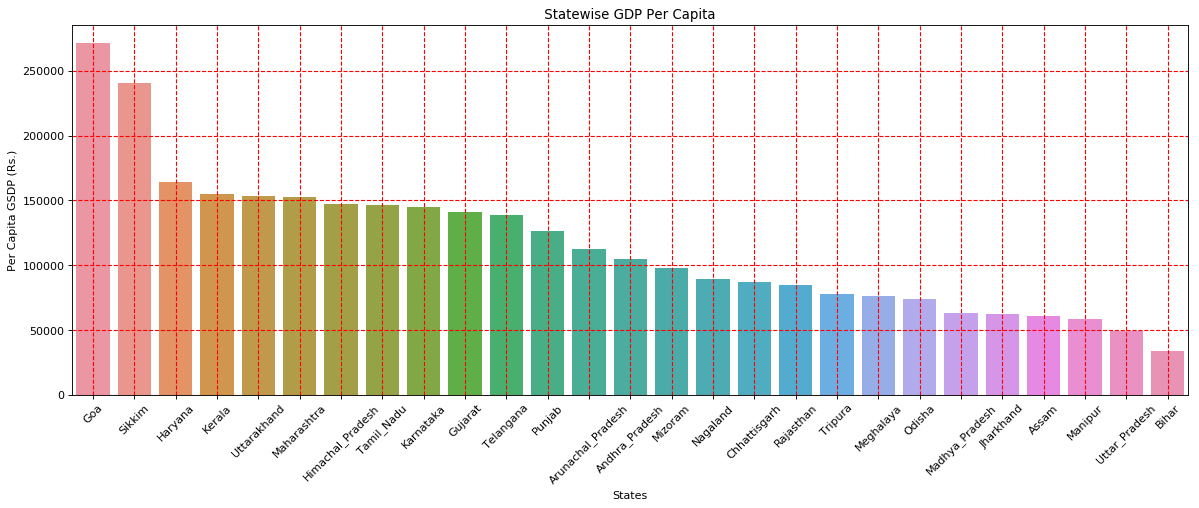

In [15]:
# Import the necessary libraries for plotting the graph for statewise GDP per capita.
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
import sys

# Ploting the bar graph
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')

sns.barplot(x='States', y='Per Capita GSDP (Rs.)', data=df6)
# The tile name indicated using the function below

plt.title(" Statewise GDP Per Capita ")
plt.xlabel('States')
plt.ylabel('Per Capita GSDP (Rs.)')
plt.xticks(rotation=45)

plt.grid(True, linewidth= 1, linestyle="--",color ="r")
plt.show()


## From the Above graph, we can see that the Goa is the top GDP per capita then sikkim. The lowest GDP per capita in rupees is Bihar and the second lowest is Uttar Pradesh.

## Identify the top 5 and the bottom 5 states based on the GDP per capita.

In [16]:
df7=df6.iloc[0:5,] 
df7   # Top 5 states are given below in the data starting Goa, Sikkim, Haryana, Kerla,Uttarakhand

,States,Per Capita GSDP (Rs.)
7,Goa,271793
24,Sikkim,240274
9,Haryana,164077
13,Kerala,154778
28,Uttarakhand,153076


In [17]:
df5 = df6.iloc[[-1,-2,-3,-4,-5],:]  # We can see the Bottom 5 states having low capita such as Bhihar, Uttar pradesh, Manipur, Assam & Jharkhand
df5

,States,Per Capita GSDP (Rs.)
3,Bihar,33954
29,Uttar_Pradesh,49450
16,Manipur,58442
2,Assam,60621
11,Jharkhand,62091


## Find the ratio of the highest per capita GDP to the lowest per capita GDP.

In [18]:

Ratio = df6['Per Capita GSDP (Rs.)'].max()/df6['Per Capita GSDP (Rs.)'].min()

Ratio

8.004741709371503

## 8.0 is the ratio of the highest state per capita(Goa) to the lowest state per capita(Bihar) 

## Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

In [19]:
df # Get the original datasets which we have already merged after dropping the union teritories

,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Primary,Public administration,"Real estate, ownership of dwelling & professional services",Secondary,States,Tertiary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting"
0,14819416,4664889,1151729,1900863,52646842,4672266,1484300,4215389,104977,16303716,2200897,4405409,10488884,Andhra_Pradesh,22032942,4233400,5076984
1,686117,147842,113527,25207,1676119,26120,30842,218728,112718,716959,243867,48418,287489,Arunachal_Pradesh,631844,60421,35203
2,3855548,1733568,296587,543651,19809800,2002936,1471149,1795658,60621,5326697,1373611,1412466,4033091,Assam,9307109,2987155,1194568
3,7951890,3449763,345168,1178022,37391988,2189965,68107,4587589,33954,8019997,2078171,3740641,5984896,Bihar,22179969,7448373,3147173
5,3948847,2669855,1198438,739057,23498180,4370593,2451970,1112232,86860,6400817,867982,2462166,8238886,Chhattisgarh,7588778,1535571,871770
7,308507,165819,204110,233618,4063307,1177608,3622,180431,271793,312129,346486,407099,1547536,Goa,1738217,380927,189656
8,13769969,5526017,3409983,4606644,89502727,24087538,2117218,3123413,141263,15887187,2576195,5179502,33023538,Gujarat,30220377,10178713,4555910
9,8015238,3702571,1101919,1671486,43746207,7756921,25186,2001581,164077,8040424,1036377,6970183,12561411,Haryana,19226568,4986319,2560623
10,1514981,808256,767268,362521,10436879,2543637,33385,923164,147330,1548366,553974,1125937,4119162,Himachal_Pradesh,4133326,615496,552234
11,3211065,1789834,337489,551441,21710718,4114148,2037289,1375410,62091,5248354,1088325,1656784,6241471,Jharkhand,8133341,1991359,1470022


In [20]:
df['Per_Primary']=(df['Primary']/df['Gross State Domestic Product'])*100# Calcuating the Primary % by dividing it by Per capita GDP
df

,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Primary,Public administration,"Real estate, ownership of dwelling & professional services",Secondary,States,Tertiary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Per_Primary
0,14819416,4664889,1151729,1900863,52646842,4672266,1484300,4215389,104977,16303716,2200897,4405409,10488884,Andhra_Pradesh,22032942,4233400,5076984,31
1,686117,147842,113527,25207,1676119,26120,30842,218728,112718,716959,243867,48418,287489,Arunachal_Pradesh,631844,60421,35203,43
2,3855548,1733568,296587,543651,19809800,2002936,1471149,1795658,60621,5326697,1373611,1412466,4033091,Assam,9307109,2987155,1194568,27
3,7951890,3449763,345168,1178022,37391988,2189965,68107,4587589,33954,8019997,2078171,3740641,5984896,Bihar,22179969,7448373,3147173,21
5,3948847,2669855,1198438,739057,23498180,4370593,2451970,1112232,86860,6400817,867982,2462166,8238886,Chhattisgarh,7588778,1535571,871770,27
7,308507,165819,204110,233618,4063307,1177608,3622,180431,271793,312129,346486,407099,1547536,Goa,1738217,380927,189656,8
8,13769969,5526017,3409983,4606644,89502727,24087538,2117218,3123413,141263,15887187,2576195,5179502,33023538,Gujarat,30220377,10178713,4555910,18
9,8015238,3702571,1101919,1671486,43746207,7756921,25186,2001581,164077,8040424,1036377,6970183,12561411,Haryana,19226568,4986319,2560623,18
10,1514981,808256,767268,362521,10436879,2543637,33385,923164,147330,1548366,553974,1125937,4119162,Himachal_Pradesh,4133326,615496,552234,15
11,3211065,1789834,337489,551441,21710718,4114148,2037289,1375410,62091,5248354,1088325,1656784,6241471,Jharkhand,8133341,1991359,1470022,24


In [21]:
df['Per_Secondary']=(df['Secondary']/df['Gross State Domestic Product'])*100 # Clacuating the Secondary divided by Gross state 
df

,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Primary,Public administration,"Real estate, ownership of dwelling & professional services",Secondary,States,Tertiary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Per_Primary,Per_Secondary
0,14819416,4664889,1151729,1900863,52646842,4672266,1484300,4215389,104977,16303716,2200897,4405409,10488884,Andhra_Pradesh,22032942,4233400,5076984,31,20
1,686117,147842,113527,25207,1676119,26120,30842,218728,112718,716959,243867,48418,287489,Arunachal_Pradesh,631844,60421,35203,43,17
2,3855548,1733568,296587,543651,19809800,2002936,1471149,1795658,60621,5326697,1373611,1412466,4033091,Assam,9307109,2987155,1194568,27,20
3,7951890,3449763,345168,1178022,37391988,2189965,68107,4587589,33954,8019997,2078171,3740641,5984896,Bihar,22179969,7448373,3147173,21,16
5,3948847,2669855,1198438,739057,23498180,4370593,2451970,1112232,86860,6400817,867982,2462166,8238886,Chhattisgarh,7588778,1535571,871770,27,35
7,308507,165819,204110,233618,4063307,1177608,3622,180431,271793,312129,346486,407099,1547536,Goa,1738217,380927,189656,8,38
8,13769969,5526017,3409983,4606644,89502727,24087538,2117218,3123413,141263,15887187,2576195,5179502,33023538,Gujarat,30220377,10178713,4555910,18,37
9,8015238,3702571,1101919,1671486,43746207,7756921,25186,2001581,164077,8040424,1036377,6970183,12561411,Haryana,19226568,4986319,2560623,18,29
10,1514981,808256,767268,362521,10436879,2543637,33385,923164,147330,1548366,553974,1125937,4119162,Himachal_Pradesh,4133326,615496,552234,15,39
11,3211065,1789834,337489,551441,21710718,4114148,2037289,1375410,62091,5248354,1088325,1656784,6241471,Jharkhand,8133341,1991359,1470022,24,29


In [22]:
df['Per_Tertiary']=(df['Tertiary']/df['Gross State Domestic Product'])*100
df

,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Primary,Public administration,"Real estate, ownership of dwelling & professional services",Secondary,States,Tertiary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Per_Primary,Per_Secondary,Per_Tertiary
0,14819416,4664889,1151729,1900863,52646842,4672266,1484300,4215389,104977,16303716,2200897,4405409,10488884,Andhra_Pradesh,22032942,4233400,5076984,31,20,42
1,686117,147842,113527,25207,1676119,26120,30842,218728,112718,716959,243867,48418,287489,Arunachal_Pradesh,631844,60421,35203,43,17,38
2,3855548,1733568,296587,543651,19809800,2002936,1471149,1795658,60621,5326697,1373611,1412466,4033091,Assam,9307109,2987155,1194568,27,20,47
3,7951890,3449763,345168,1178022,37391988,2189965,68107,4587589,33954,8019997,2078171,3740641,5984896,Bihar,22179969,7448373,3147173,21,16,59
5,3948847,2669855,1198438,739057,23498180,4370593,2451970,1112232,86860,6400817,867982,2462166,8238886,Chhattisgarh,7588778,1535571,871770,27,35,32
7,308507,165819,204110,233618,4063307,1177608,3622,180431,271793,312129,346486,407099,1547536,Goa,1738217,380927,189656,8,38,43
8,13769969,5526017,3409983,4606644,89502727,24087538,2117218,3123413,141263,15887187,2576195,5179502,33023538,Gujarat,30220377,10178713,4555910,18,37,34
9,8015238,3702571,1101919,1671486,43746207,7756921,25186,2001581,164077,8040424,1036377,6970183,12561411,Haryana,19226568,4986319,2560623,18,29,44
10,1514981,808256,767268,362521,10436879,2543637,33385,923164,147330,1548366,553974,1125937,4119162,Himachal_Pradesh,4133326,615496,552234,15,39,40
11,3211065,1789834,337489,551441,21710718,4114148,2037289,1375410,62091,5248354,1088325,1656784,6241471,Jharkhand,8133341,1991359,1470022,24,29,37


In [23]:
# Filter the States and Percentage Primary,Secondary and Tertiary and stored in df2

df_P = df[['States','Per Capita GSDP (Rs.)','Per_Primary','Per_Secondary','Per_Tertiary']] # extracting the state and the all India GDP
df_P



,States,Per Capita GSDP (Rs.),Per_Primary,Per_Secondary,Per_Tertiary
0,Andhra_Pradesh,104977,31,20,42
1,Arunachal_Pradesh,112718,43,17,38
2,Assam,60621,27,20,47
3,Bihar,33954,21,16,59
5,Chhattisgarh,86860,27,35,32
7,Goa,271793,8,38,43
8,Gujarat,141263,18,37,34
9,Haryana,164077,18,29,44
10,Himachal_Pradesh,147330,15,39,40
11,Jharkhand,62091,24,29,37


## Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

In [24]:
# Before plotting the graph, we can sort the data sets from the highest to the lowset GDP per capita

Sorted_df= df_P.sort_values(by='Per Capita GSDP (Rs.)',ascending = True)
Sorted_df


,States,Per Capita GSDP (Rs.),Per_Primary,Per_Secondary,Per_Tertiary
3,Bihar,33954,21,16,59
29,Uttar_Pradesh,49450,25,24,44
16,Manipur,58442,21,12,65
2,Assam,60621,27,20,47
11,Jharkhand,62091,24,29,37
14,Madhya_Pradesh,62989,37,21,38
20,Odisha,73979,28,28,38
17,Meghalaya,76228,18,26,49
27,Tripura,77358,32,16,50
23,Rajasthan,84837,31,21,42


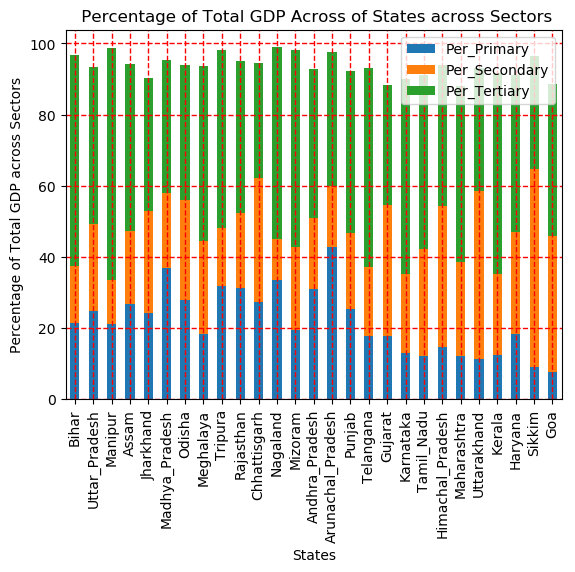

In [25]:
# Ploting the bar graph


Sorted_df.plot(x='States',y=['Per_Primary','Per_Secondary','Per_Tertiary'],stacked=True, kind='bar')
# The tile name indicated using the function below

plt.title(" Percentage of Total GDP Across of States across Sectors")
plt.xlabel('States')
plt.ylabel('Percentage of Total GDP across Sectors')
plt.xticks(rotation=90)

plt.grid(True, linewidth= 1, linestyle="--",color ="r")
plt.show()

## From the above graphs we can clearly see that 

#### 1. Bihar State is the lowest per Capita. The % Tertiary is higher than % Secondary & % Primary. Bihar needs to invest money to improve the Seconday sector

#### 2. Goa is the highest GDP , the Primary %is less compared % tertiary and secondary.



### Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.
Note: Categorisation into four groups will simplify the subsequent analysis, as otherwise, comparing the data of all the states would become quite exhaustive.
For each category (C1, C2, C3, C4):

In [26]:
Category_GDP = Sorted_df[['States','Per Capita GSDP (Rs.)']] # filter the States and Per Capita GSDP
Category_GDP

,States,Per Capita GSDP (Rs.)
3,Bihar,33954
29,Uttar_Pradesh,49450
16,Manipur,58442
2,Assam,60621
11,Jharkhand,62091
14,Madhya_Pradesh,62989
20,Odisha,73979
17,Meghalaya,76228
27,Tripura,77358
23,Rajasthan,84837


In [27]:
# Calculate the Quantiles and lables of each coloumns 

df["Quantile"] = pd.qcut(df["Per Capita GSDP (Rs.)"], q=[0,.2,.5,.85,1])
df["Labels"] = pd.qcut(df["Per Capita GSDP (Rs.)"], q=[0,.2,.5,.85,1], labels=['C4','C3','C2','C1'])


In [28]:
df

,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Primary,...,Secondary,States,Tertiary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Per_Primary,Per_Secondary,Per_Tertiary,Quantile,Labels
0,14819416,4664889,1151729,1900863,52646842,4672266,1484300,4215389,104977,16303716,...,10488884,Andhra_Pradesh,22032942,4233400,5076984,31,20,42,"(65187.0, 104977.0]",C3
1,686117,147842,113527,25207,1676119,26120,30842,218728,112718,716959,...,287489,Arunachal_Pradesh,631844,60421,35203,43,17,38,"(104977.0, 153246.2]",C2
2,3855548,1733568,296587,543651,19809800,2002936,1471149,1795658,60621,5326697,...,4033091,Assam,9307109,2987155,1194568,27,20,47,"(33953.999, 65187.0]",C4
3,7951890,3449763,345168,1178022,37391988,2189965,68107,4587589,33954,8019997,...,5984896,Bihar,22179969,7448373,3147173,21,16,59,"(33953.999, 65187.0]",C4
5,3948847,2669855,1198438,739057,23498180,4370593,2451970,1112232,86860,6400817,...,8238886,Chhattisgarh,7588778,1535571,871770,27,35,32,"(65187.0, 104977.0]",C3
7,308507,165819,204110,233618,4063307,1177608,3622,180431,271793,312129,...,1547536,Goa,1738217,380927,189656,8,38,43,"(153246.2, 271793.0]",C1
8,13769969,5526017,3409983,4606644,89502727,24087538,2117218,3123413,141263,15887187,...,33023538,Gujarat,30220377,10178713,4555910,18,37,34,"(104977.0, 153246.2]",C2
9,8015238,3702571,1101919,1671486,43746207,7756921,25186,2001581,164077,8040424,...,12561411,Haryana,19226568,4986319,2560623,18,29,44,"(153246.2, 271793.0]",C1
10,1514981,808256,767268,362521,10436879,2543637,33385,923164,147330,1548366,...,4119162,Himachal_Pradesh,4133326,615496,552234,15,39,40,"(104977.0, 153246.2]",C2
11,3211065,1789834,337489,551441,21710718,4114148,2037289,1375410,62091,5248354,...,6241471,Jharkhand,8133341,1991359,1470022,24,29,37,"(33953.999, 65187.0]",C4


In [29]:
df['Gross State Domestic Product'] = df['Gross State Domestic Product'].astype(float)
df['Per Capita GSDP (Rs.)'] = df['Per Capita GSDP (Rs.)'].astype(float)
df['States']=df['States'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 29
Data columns (total 22 columns):
Agriculture, forestry and fishing                                       27 non-null object
Construction                                                            27 non-null object
Electricity, gas, water supply & other utility services                 27 non-null object
Financial services                                                      27 non-null object
Gross State Domestic Product                                            27 non-null float64
Manufacturing                                                           27 non-null object
Mining and quarrying                                                    27 non-null object
Other services                                                          27 non-null object
Per Capita GSDP (Rs.)                                                   27 non-null float64
Primary                                                                 27 n

In [30]:
## We can see that Bihar is the lowest Per capita with C4 caterogy and Goa being the highest per capita as C1 category.
# Let us see the top 3/4/5 - Sub cateogry impact to the overall Per capita GDP contributing 80% of GDP.
# We can use the Pareto chart to draw this graph and make it clear about the GDP contributing factors.
# filter out the needed data frame from the above subsectors 

In [31]:
df.set_index('States',inplace=True,)
df# Checking the coloumns in the cleaned data now. 

,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Primary,...,"Real estate, ownership of dwelling & professional services",Secondary,Tertiary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Per_Primary,Per_Secondary,Per_Tertiary,Quantile,Labels
States,,,,,,,,,,,,,,,,,,,,,
Andhra_Pradesh,14819416,4664889,1151729,1900863,52646842,4672266,1484300,4215389,104977,16303716,...,4405409,10488884,22032942,4233400,5076984,31,20,42,"(65187.0, 104977.0]",C3
Arunachal_Pradesh,686117,147842,113527,25207,1676119,26120,30842,218728,112718,716959,...,48418,287489,631844,60421,35203,43,17,38,"(104977.0, 153246.2]",C2
Assam,3855548,1733568,296587,543651,19809800,2002936,1471149,1795658,60621,5326697,...,1412466,4033091,9307109,2987155,1194568,27,20,47,"(33953.999, 65187.0]",C4
Bihar,7951890,3449763,345168,1178022,37391988,2189965,68107,4587589,33954,8019997,...,3740641,5984896,22179969,7448373,3147173,21,16,59,"(33953.999, 65187.0]",C4
Chhattisgarh,3948847,2669855,1198438,739057,23498180,4370593,2451970,1112232,86860,6400817,...,2462166,8238886,7588778,1535571,871770,27,35,32,"(65187.0, 104977.0]",C3
Goa,308507,165819,204110,233618,4063307,1177608,3622,180431,271793,312129,...,407099,1547536,1738217,380927,189656,8,38,43,"(153246.2, 271793.0]",C1
Gujarat,13769969,5526017,3409983,4606644,89502727,24087538,2117218,3123413,141263,15887187,...,5179502,33023538,30220377,10178713,4555910,18,37,34,"(104977.0, 153246.2]",C2
Haryana,8015238,3702571,1101919,1671486,43746207,7756921,25186,2001581,164077,8040424,...,6970183,12561411,19226568,4986319,2560623,18,29,44,"(153246.2, 271793.0]",C1
Himachal_Pradesh,1514981,808256,767268,362521,10436879,2543637,33385,923164,147330,1548366,...,1125937,4119162,4133326,615496,552234,15,39,40,"(104977.0, 153246.2]",C2


In [32]:
# Quantiles coloumn is not needed. so we can drop it 
Newdf = df.drop(['Quantile','Per_Primary','Per_Secondary','Per_Tertiary','Primary','Secondary','Tertiary'],axis=1)

Newdf.reset_index(level=0, inplace=True)
Newdf



,States,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Public administration,"Real estate, ownership of dwelling & professional services","Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Labels
0,Andhra_Pradesh,14819416,4664889,1151729,1900863,52646842,4672266,1484300,4215389,104977,2200897,4405409,4233400,5076984,C3
1,Arunachal_Pradesh,686117,147842,113527,25207,1676119,26120,30842,218728,112718,243867,48418,60421,35203,C2
2,Assam,3855548,1733568,296587,543651,19809800,2002936,1471149,1795658,60621,1373611,1412466,2987155,1194568,C4
3,Bihar,7951890,3449763,345168,1178022,37391988,2189965,68107,4587589,33954,2078171,3740641,7448373,3147173,C4
4,Chhattisgarh,3948847,2669855,1198438,739057,23498180,4370593,2451970,1112232,86860,867982,2462166,1535571,871770,C3
5,Goa,308507,165819,204110,233618,4063307,1177608,3622,180431,271793,346486,407099,380927,189656,C1
6,Gujarat,13769969,5526017,3409983,4606644,89502727,24087538,2117218,3123413,141263,2576195,5179502,10178713,4555910,C2
7,Haryana,8015238,3702571,1101919,1671486,43746207,7756921,25186,2001581,164077,1036377,6970183,4986319,2560623,C1
8,Himachal_Pradesh,1514981,808256,767268,362521,10436879,2543637,33385,923164,147330,553974,1125937,615496,552234,C2
9,Jharkhand,3211065,1789834,337489,551441,21710718,4114148,2037289,1375410,62091,1088325,1656784,1991359,1470022,C4


In [33]:
Newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 15 columns):
States                                                                  27 non-null object
Agriculture, forestry and fishing                                       27 non-null object
Construction                                                            27 non-null object
Electricity, gas, water supply & other utility services                 27 non-null object
Financial services                                                      27 non-null object
Gross State Domestic Product                                            27 non-null float64
Manufacturing                                                           27 non-null object
Mining and quarrying                                                    27 non-null object
Other services                                                          27 non-null object
Per Capita GSDP (Rs.)                                                   27 no

In [34]:
# Define the function and do the 
def findtop(cla):
    Category = Newdf.loc[(Newdf['Labels']==cla),:]  # Labels to be called here
    Category=Category.transpose() # Transpose the Data
    new_header=Category.iloc[0]
    Category=Category.iloc[1:]
    Category.columns=new_header # move to the new header 
    Category=Category.loc[(Category.index != 'Labels'),:]
    Category=Category.fillna(0)
    Category[new_header]=Category.loc[:,(new_header)].astype(int)
    GSDP = Category.loc[(Category.index == 'Gross State Domestic Product'),:]
    GSDP = GSDP.transpose()
    A= GSDP.sum()
    B=int(A)
    Category.loc[:,'Total Subsector'] = Category.sum(axis=1)
    Category.loc[:,'Per%'] = round((Category.loc[:,'Total Subsector']/B)*100,2)       
    Subcat=['Agriculture, forestry and fishing','Construction','Electricity, gas, water supply & other utility services','Manufacturing','Financial services','Mining and quarrying','Real estate, ownership of dwelling & professional services','Public administration','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Other services']
    k = Category[Category.index.isin(Subcat)]
    k = k.sort_values(by='Per%', axis=0,ascending = True)
    k.loc[:,'Cumm%']=k['Per%'].cumsum(axis = 0,skipna = True)
    k = k.loc[(k ['Cumm%'] <= 80),:]
    return k


In [35]:
C1States =findtop('C1') # find the C1 states only contributing to 80% 
C1States


States,Goa,Haryana,Kerala,Sikkim,Total Subsector,Per%,Cumm%
Mining and quarrying,3622,25186,558824,1329,588961,1,1
"Electricity, gas, water supply & other utility services",204110,1101919,482470,212499,2000998,2,3
Public administration,346486,1036377,2068915,119514,3571292,4,6
Financial services,233618,1671486,2010306,21079,3936489,4,10
"Transport, storage, communication & services related to broadcasting",189656,2560623,4020934,47347,6818560,7,17
Other services,180431,2001581,5728645,149265,8059922,8,24
Construction,165819,3702571,7314003,82058,11264451,11,36
Manufacturing,1177608,7756921,4273567,550697,13758793,14,49
"Trade, repair, hotels and restaurants",380927,4986319,8557345,70568,13995159,14,63
"Agriculture, forestry and fishing",308507,8015238,5930617,137447,14391809,14,77


In [36]:
C2States = findtop('C2') #find the C2 only contributing to 80% 
C2States

States,Arunachal_Pradesh,Gujarat,Himachal_Pradesh,Karnataka,Maharashtra,Punjab,Tamil_Nadu,Telangana,Uttarakhand,Total Subsector,Per%,Cumm%
Mining and quarrying,30842,2117218,33385,846882,5282727,10354,265536,1541853,244549,10373346,2,2
"Electricity, gas, water supply & other utility services",113527,3409983,767268,1425762,4334702,911611,1710379,716266,433880,13823378,2,4
Public administration,243867,2576195,553974,2232584,5426991,1842730,3400800,1711265,579409,18567815,3,7
"Transport, storage, communication & services related to broadcasting",35203,4555910,552234,5097652,9697246,1951809,7188320,3604741,1066693,33749808,6,13
Other services,218728,3123413,923164,5308174,10806363,3303041,7430115,4158229,982430,36253657,6,19
Financial services,25207,4606644,362521,4094169,16143324,2057520,5598498,3023729,385030,36296642,6,25
Construction,147842,5526017,808256,6104799,9450211,2202962,12216718,2854024,1342733,40653562,7,32
"Trade, repair, hotels and restaurants",60421,10178713,615496,8991658,15839100,4419919,12895842,6494607,1743106,61238862,10,43
"Agriculture, forestry and fishing",686117,13769969,1514981,11219422,16475655,9285716,13064238,7591501,1601423,75209022,13,56
"Real estate, ownership of dwelling & professional services",48418,5179502,1125937,24766393,30718051,3142786,16830213,9478839,831307,92121446,16,71


In [37]:
C3States = findtop('C3') # filter the C3 states
C3States

States,Andhra_Pradesh,Chhattisgarh,Meghalaya,Mizoram,Nagaland,Odisha,Rajasthan,Tripura,Total Subsector,Per%,Cumm%
"Electricity, gas, water supply & other utility services",1151729,1198438,54473,128365,37944,833067,1122888,77870,4604774,3,3
Financial services,1900863,739057,64091,23168,60393,1065147,1827413,86094,5766226,3,6
Public administration,2200897,867982,239782,206259,295424,1318221,2460364,338244,7927173,4,10
Mining and quarrying,1484300,2451970,84529,8588,8280,2586328,4069385,142391,10835771,6,16
"Transport, storage, communication & services related to broadcasting",5076984,871770,148189,52587,77521,2034016,3814461,155956,12231484,7,23
Other services,4215389,1112232,214211,186222,259186,2340603,4164287,323287,12815417,7,30
Construction,4664889,2669855,150256,133228,156072,2402396,5353326,177899,15707921,9,39
"Real estate, ownership of dwelling & professional services",4405409,2462166,150409,55068,159651,2348714,6451997,190704,16224118,9,48
"Trade, repair, hotels and restaurants",4233400,1535571,383974,114315,140781,3149555,7297290,390423,17245309,10,58
Manufacturing,4672266,4370593,433213,8479,18346,5754229,6552580,228625,22038331,12,70


In [38]:
C4States = findtop('C4') # filter the C4 states
C4States

States,Assam,Bihar,Jharkhand,Madhya_Pradesh,Manipur,Uttar_Pradesh,Total Subsector,Per%,Cumm%
"Electricity, gas, water supply & other utility services",296587,345168,337489,1272905,27490,2030625,4310264,2,2
Mining and quarrying,1471149,68107,2037289,1618373,0,901501,6096419,3,4
Financial services,543651,1178022,551441,1988794,30315,3392275,7684498,3,8
Public administration,1373611,2078171,1088325,2497321,297078,6152124,13486630,6,14
Other services,1795658,4587589,1375410,2747805,317930,5034623,15859015,7,20
"Transport, storage, communication & services related to broadcasting",1194568,3147173,1470022,2865802,109726,7404509,16191800,7,27
Construction,1733568,3449763,1789834,4403151,143182,11256450,22775948,10,37
"Real estate, ownership of dwelling & professional services",1412466,3740641,1656784,2660123,159335,14548185,24177534,10,47
Manufacturing,2002936,2189965,4114148,4368833,49501,12261649,24987032,11,58
"Trade, repair, hotels and restaurants",2987155,7448373,1991359,5357515,262950,9437243,27484595,12,70


For each category (C1, C2, C3, C4):
Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.
Note-I: The nomenclature for this project is as follows: primary, secondary and tertiary are named 'sectors', while agriculture, manufacturing etc. are named 'sub-sectors'.
Note-II: If the top 3 sub-sectors contribute to, say, 79% of the GDP of some category, you can report "These top 3 sub-sectors contribute to approximately 80% of the GDP". This is to simplify the analysis and make the results consumable. (Remember, the CEO has to present the report to the CMs, and CMs have limited time; so, the analysis needs to be sharp and concise.)
Plot the contribution of the sub-sectors as a percentage of the GSDP of each category. 

In [39]:
# Plot the Graph on the individual values 

#  Now plot the Category of C1, C2, C3, C4

x1 = C1States.index
x2 = C2States.index
x3 = C3States.index
x4 = C4States.index

y1 = C1States['Per%']
y2 = C2States['Per%']
y3 = C3States['Per%']
y4 = C4States['Per%']

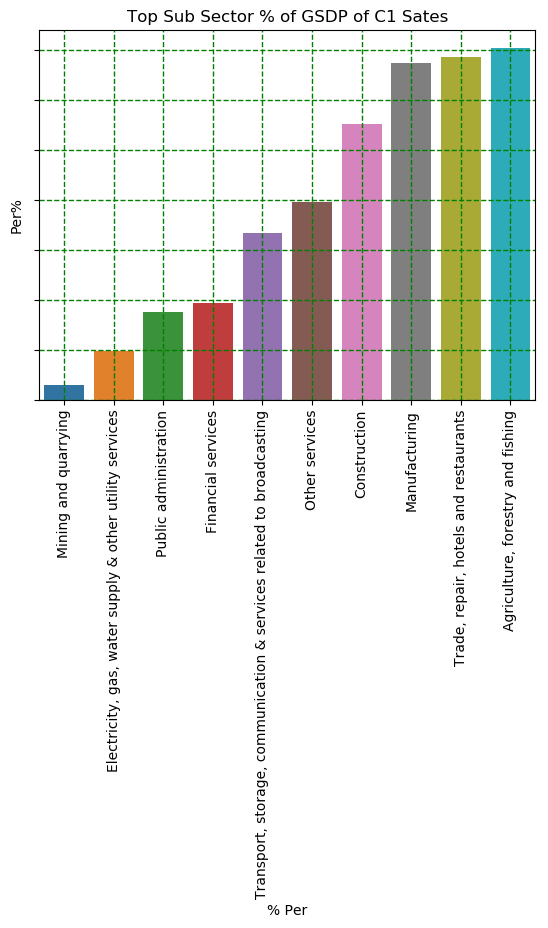

In [40]:
# Plot the graph and size the graph and legend outside the graph

## C1States 

plt.title('Top Sub Sector % of GSDP of C1 Sates')
plt.ylabel('Sub Sector')
plt.xlabel('% Per')
a=sns.barplot(x=x1,y=y1)
b = a.set_yticklabels(a.get_yticklabels(),rotation =45)
plt.grid(True, linewidth= 1, linestyle="--",color="g")
plt.xticks(rotation=90)
plt.show()



## <font color = green> 1. From the above graph we can see clearly that the Agriculture ,forestry & finishing is the most contributing to GDP.  second is Trade, repair, hotels and resturants & Manufacturing these three contributes the approx. 80% of the C1 States GDP. </font>

## <font color = red> 2. But the other inferences of this Graph, is Mining & Quarring needs to be focussed espcially in Goa where tourism and mining is the major revenue for the growth of the States.</font>




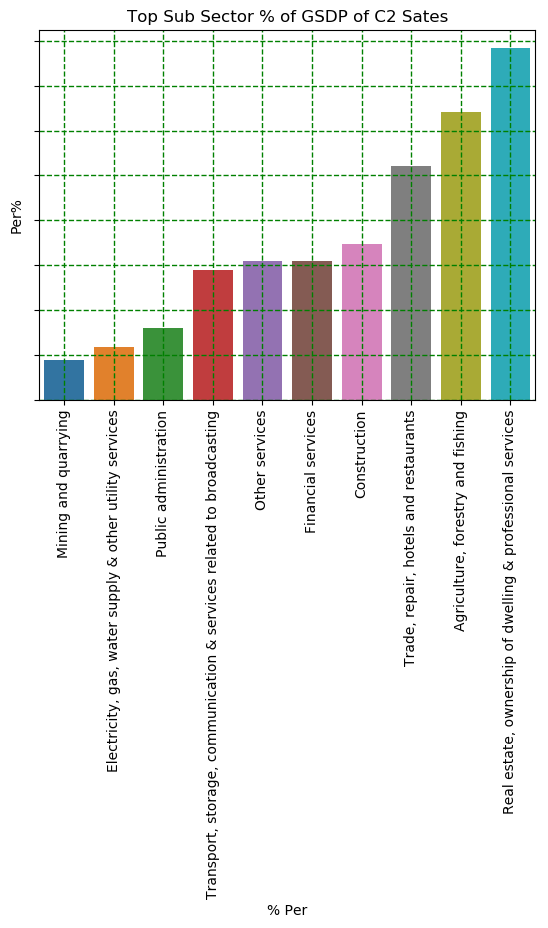

In [41]:
# Plot the graph and size the graph and legend outside the graph

## C2States - 

plt.title('Top Sub Sector % of GSDP of C2 Sates')
plt.ylabel('Sub Sector')
plt.xlabel('% Per')
a=sns.barplot(x=x2,y=y2)
b = a.set_yticklabels(a.get_yticklabels(),rotation =45)
plt.grid(True, linewidth= 1, linestyle="--",color="g")
plt.xticks(rotation=90)
plt.show()

## <font color = green>From the above graph we can see C2 States %GDP contribution is Real estate,Ownership of dwelling & professional services, Agriculture, forestry and fishing </font>

## <font color = red>Recomended to do the investment and see the policy of the government especially in the Electricity , Gas, Water and other utility services. </font>

## Public Transports, Communicaitons are still to be focussed by exploring tieups with the other private partners. BSNL needs to be outsourced whcih will given back a good amout of money back to the Government.


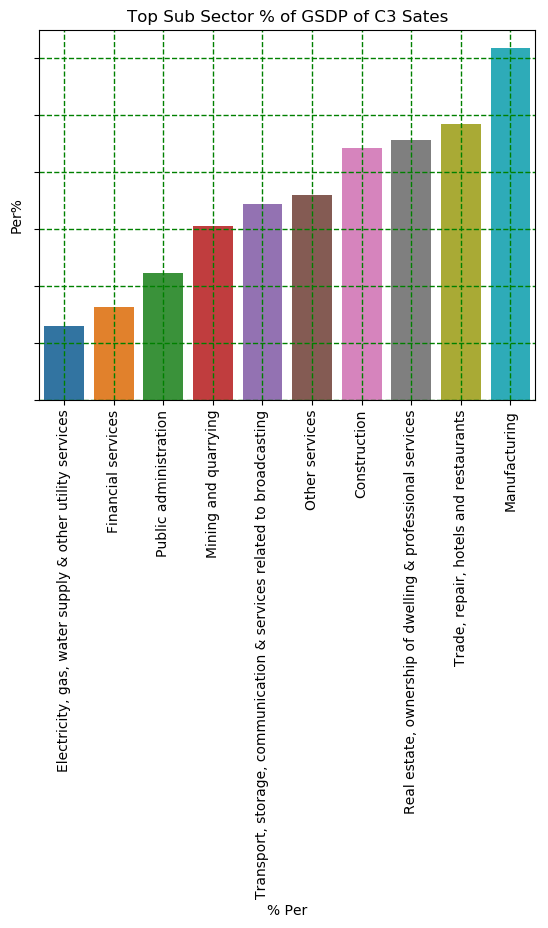

In [42]:
# Plot the graph and size the graph and legend outside the graph

## C3States - 

plt.title('Top Sub Sector % of GSDP of C3 Sates')
plt.ylabel('Sub Sector')
plt.xlabel('% Per')
a=sns.barplot(x=x3,y=y3)
b = a.set_yticklabels(a.get_yticklabels(),rotation =45)
plt.grid(True, linewidth= 1, linestyle="--",color="g")
plt.xticks(rotation=90)
plt.show()

## <font color =green>  In C3 states, Manufacturing, Trade and repair, hotels & Restaurants is the highest contributing factor, As like C2 and C1 need more investment and do the revisit of the regulatory policies of Electricity generation and other utility services.<\font>

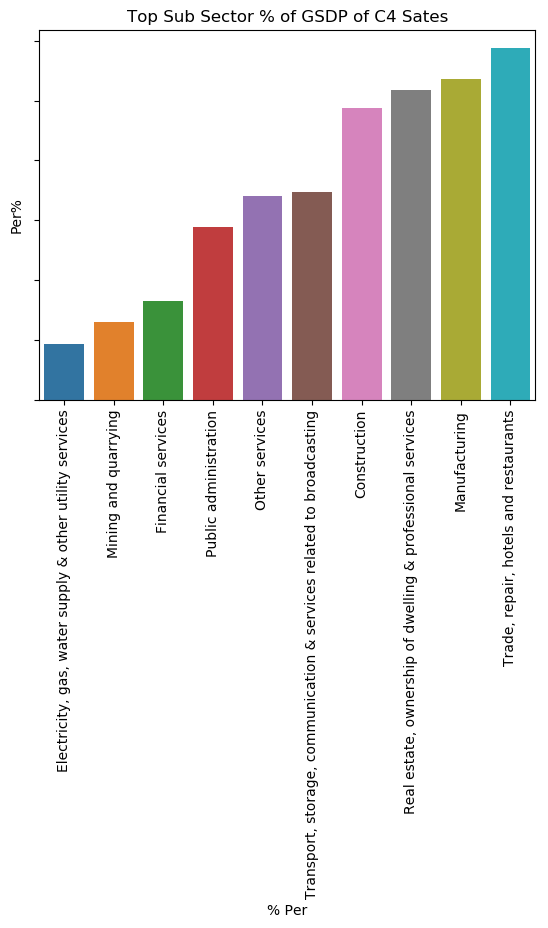

In [43]:
# Plot the graph and size the graph and legend outside the graph

## C4States - 

plt.title('Top Sub Sector % of GSDP of C4 Sates')
plt.ylabel('Sub Sector')
plt.xlabel('% Per')
a=sns.barplot(x=x4,y=y4)
b = a.set_yticklabels(a.get_yticklabels(),rotation =45)
plt.xticks(rotation=90)
plt.show()



## <font color = green>In C4 states, Trade, Repair hotels & restaturants, Manufacturing is the highest contributing factors this states. As like other Mining and Quarrying, elecctricity gas water supply needs to be invested more. <\font>

How does the GDP distribution of the top states (C1) differ from the others?
Which sub-sectors seem to be correlated with high GDP?
Which sub-sectors do the various categories need to focus on? 
Ask other such relevant questions, which you think are important, and note your insights for category separately.
Finally, provide at least two recommendations for each category to improve the per capita GDP.

In all the Sectors We can see clearly the following things C1,C2,C3,C4 

High GDP rate across country contribution is 

1. Agriculture 
2. Manufactuing
2. Real Estate, Ownership & Dwelling & Professional Services 
3. Trade, Repair, hotel & restaurants

In which high GDP states of C1 are Goa,Sikkim, Haryana, Kerala, Uttarkhand contributing more GDP this the above sectors only.

But the other way around the 

sectors such as 

1. Electricity, gas, water supply & utilities 
2. Mining & Quarrying 
3. Financial Services
4. Public Administration 

needs to be relooked in to for the improvement.

1. Goa State - Mininig is completely stand still. By regulating and reopening of all the mines the GDP % will go beyond the over all GDP rate of $1717 for 2015-16, now 2019 march $2041. But still we are in 139th position only.

2. Investment is needed in improving the Energy Sectors as it is the backbone of the country. 

3. Increase the Water supply and connecting of water sources and optimum usage of these resources will be more helful.

4. Public administration needs to be work cohesively with other government departments and it will help boosting the infracture of the states.

5. To move our country to the next level, the regulations and the policies to be revisted and time to time necessary changes will help to sustain the business and move our GDP to more than two digit %.


In [44]:
Contribution = Newdf.sort_values(by = 'Per Capita GSDP (Rs.)',ascending = False)  # GSDP per captia sort the C1 first .
Contribution = Contribution.drop(['Gross State Domestic Product','Labels'],axis =1)
Contribution

,States,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Public administration,"Real estate, ownership of dwelling & professional services","Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting"
5,Goa,308507,165819,204110,233618,1177608,3622,180431,271793,346486,407099,380927,189656
21,Sikkim,137447,82058,212499,21079,550697,1329,149265,240274,119514,75330,70568,47347
7,Haryana,8015238,3702571,1101919,1671486,7756921,25186,2001581,164077,1036377,6970183,4986319,2560623
11,Kerala,5930617,7314003,482470,2010306,4273567,558824,5728645,154778,2068915,7287633,8557345,4020934
25,Uttarakhand,1601423,1342733,433880,385030,5866252,244549,982430,153076,579409,831307,1743106,1066693
13,Maharashtra,16475655,9450211,4334702,16143324,33660294,5282727,10806363,152853,5426991,30718051,15839100,9697246
8,Himachal_Pradesh,1514981,808256,767268,362521,2543637,33385,923164,147330,553974,1125937,615496,552234
22,Tamil_Nadu,13064238,12216718,1710379,5598498,18914794,265536,7430115,146503,3400800,16830213,12895842,7188320
10,Karnataka,11219422,6104799,1425762,4094169,12953843,846882,5308174,145141,2232584,24766393,8991658,5097652
6,Gujarat,13769969,5526017,3409983,4606644,24087538,2117218,3123413,141263,2576195,5179502,10178713,4555910


In [45]:
# let see statewise, Sub category wise most contrbuting factor 

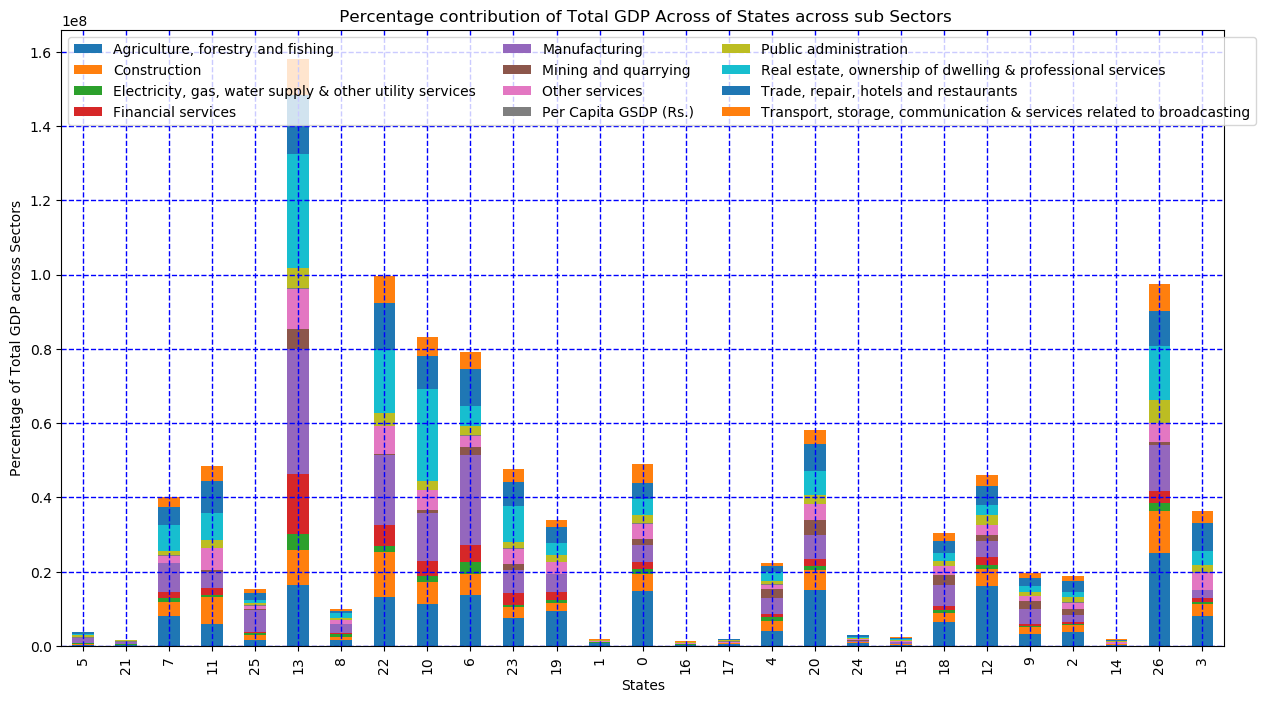

In [46]:
Contribution.plot(stacked=True, kind='bar',figsize=(15,8))
# The tile name indicated using the function below

plt.title(" Percentage contribution of Total GDP Across of States across sub Sectors")
plt.xlabel('States')
plt.ylabel('Percentage of Total GDP across Sectors')
plt.xticks(rotation=90)

plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=3)

plt.grid(True, linewidth= 1, linestyle="--",color ="b")
plt.show()

From the Above graph we can see the sub sector wise staked bar. Which gave a insights that in these below states, these subsectors contributed more to the GDP compared to other states etc.,
1. Maharashra we can see there is progress in all the subsectors next is 
2. Uttar Pradesh, 
3. Tamil nadu, 
4. Karnataka,
5. Gujarat, 

In [47]:
## Which sub-sectors seem to be correlated with high GDP?
##1. Let us see the agriculure Vs per capita

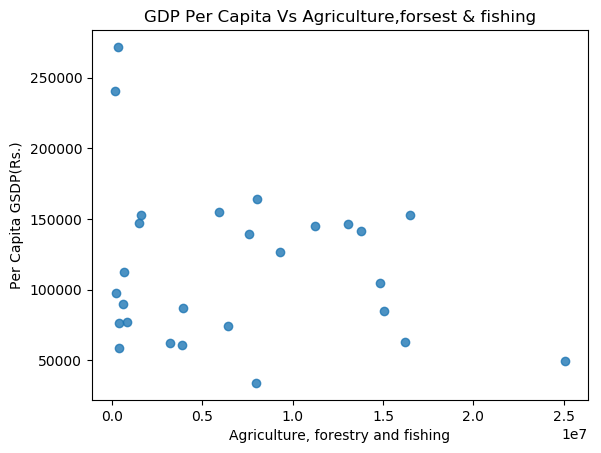

In [48]:

plt.scatter(x='Agriculture, forestry and fishing', y='Per Capita GSDP (Rs.)',data = Contribution,alpha=0.8)
plt.title('GDP Per Capita Vs Agriculture,forsest & fishing')
plt.xlabel('Agriculture, forestry and fishing')
plt.ylabel('Per Capita GSDP(Rs.)')
plt.show()


In [49]:
## We can clearly see there is not much impact on the Per Capita GDP - Relatively correlated.
## let us see the Per Capita Vs the below sub sectors 
## 1. Manufactring 
## 2. Real Estate, Ownership & Dwelling & Professional Services 
## 3. Trade, Repair, hotel & restaurants

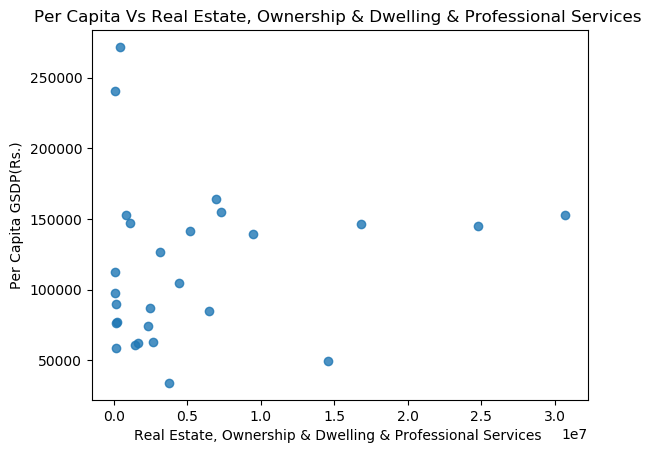

In [50]:
plt.scatter(x='Real estate, ownership of dwelling & professional services', y='Per Capita GSDP (Rs.)',data = Contribution,alpha=0.8)
plt.title('Per Capita Vs Real Estate, Ownership & Dwelling & Professional Services ')
plt.xlabel('Real Estate, Ownership & Dwelling & Professional Services ')
plt.ylabel('Per Capita GSDP(Rs.)')
plt.show()


In [51]:
# From the above graph it is strongly correlated with the percapita GSDP(Rs.)of the states.


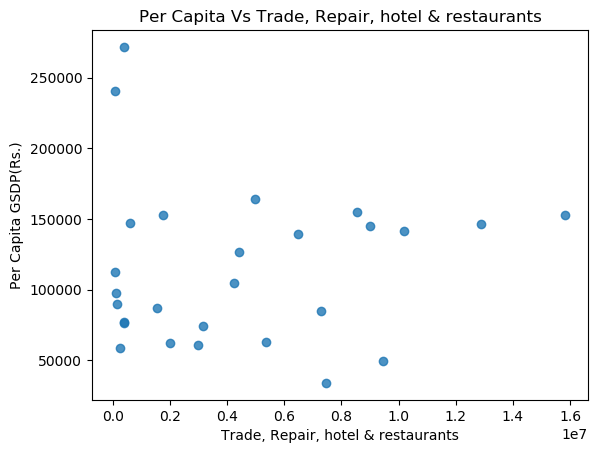

In [52]:
plt.scatter(x='Trade, repair, hotels and restaurants', y='Per Capita GSDP (Rs.)',data = Contribution,alpha=0.8)
plt.title('Per Capita Vs Trade, Repair, hotel & restaurants')
plt.xlabel('Trade, Repair, hotel & restaurants')
plt.ylabel('Per Capita GSDP(Rs.)')
plt.show()

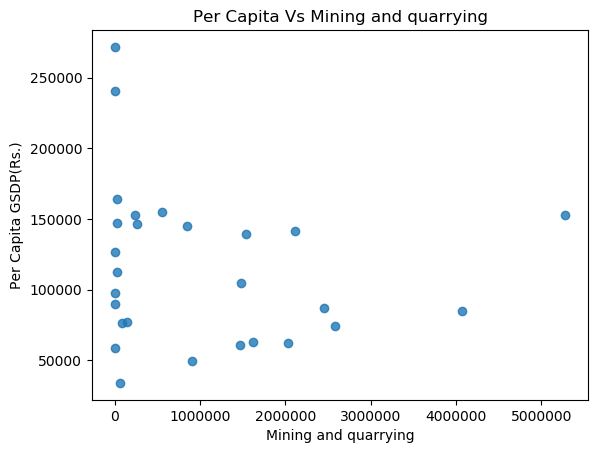

In [53]:
# He is relatively correlated. the inference from the graph

plt.scatter(x='Mining and quarrying', y='Per Capita GSDP (Rs.)',data = Contribution,alpha=0.8)
plt.title('Per Capita Vs Mining and quarrying')
plt.xlabel('Mining and quarrying')
plt.ylabel('Per Capita GSDP(Rs.)')
plt.show()

Recommendations & Suggestions:

needs to be relooked in to for the improvement.

1. Goa State - Mininig is completely stand still. By regulating and reopening of all the mines the GDP % will go beyond the over all GDP rate of $1717 for 2015-16, now 2019 march $2041. But still we are in 139th position only.

2. Investment is needed in improving the Energy Sectors as it is the backbone of the country. 

3. Increase the Water supply and connecting of water sources and optimum usage of these resources will be more helful.

4. Public administration needs to be work cohesively with other government departments and it will help boosting the infracture of the states.

5. To move our country to the next level, the regulations and the policies to be revisted and time to time necessary changes will help to sustain the business and move our GDP to more than two digit %.

6. MAKE INDIA MOVEMENT - needs more focus and ask more foreign investments escpcially my state TAMIL NADU - all automovie manufactures are struggling. 

7. Invest More in the Secondary and Tertiary sectors and make the government policies more simple and easy.

8. Move all the services to Digital front whcih will help to serve better and transparent.

9. Suggestion scheme to be inroducted for Manufacturing and all sectors whcih company in manufacturing sector wise Awards to be given for the highest contribution to GDP

10. More Suggestions to be collected from the public and private organisation to improve the GDP rate and through the NITI Aayog in all the sector wise.


Growth of Nation is in these areas and it will contribute More GDP.

thank you !!
Jai Hind.

## Part B: GDP & Education


Data
Data II: This section will require the dropout rate dataset apart from the dataset that you used in Part-1 of the case study. Download instructions are provided in the next segment.

 

Part-II: GDP and Education

Analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state. Choose an appropriate plot to conduct this analysis.

Write down the key insights you draw from this data:

Form at least one reasonable hypothesis for the observations from the data.

 

In [54]:
# Importing the necessary libraries
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import sys
import glob,os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Read the Data of Data Part I-B: This dataset consists of the GSDP (Gross State Domestic Product) data for the Level of Education

Edu1 = pd.read_csv("C:/Users/103591/Downloads/Data Sets Part 2B/rs_session243_au570_1.1.csv")
Edu2 = pd.read_csv("C:/Users/103591/Downloads/Data Sets Part 1A/ab40c054-5031-4376-b52e-9813e776f65e.csv")
Edu1.head(10) # Read the first 10 rows across the data set to view the data /.

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,1,1,1,1,1,2,6,7,10,14,16,17
1,2,Andhra Pradesh,3,4,7,3,4,5,13,13,16,0,12,nan
2,3,Arunachal Pradesh,15,11,11,7,6,7,13,14,17,5,17,18
3,4,Assam,6,7,15,7,7,11,27,30,27,5,7,nan
4,5,Bihar,nan,2,nan,nan,3,4,30,25,26,nan,nan,nan
5,6,Chandigarh,nan,nan,nan,0,1,0,nan,nan,nan,14,11,11
6,7,Chhatisgarh,4,1,3,5,4,6,15,23,21,nan,nan,3
7,8,Dadra & Nagar Haveli,nan,2,1,3,4,4,24,29,17,10,6,9
8,9,Daman & Diu,nan,1,1,nan,4,3,12,20,32,1,10,40
9,10,Delhi,nan,nan,nan,nan,3,1,5,9,12,14,16,17


In [56]:
Edu2.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402,11063,143175,247144,158074,42367,615606,297539,...,359433,19208,724049,115523,nan,3979,18768,343767,16818,8736039
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404,12547,156864,282368,177511,38120,724495,347032,...,401493,21663,822903,131835,nan,4421,21609,391238,18875,9946636
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272,14602,177745,317101,206690,35921,807623,400662,...,452186,25593,944146,149817,nan,5159,24787,443783,21870,11236635
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468,16761,198098,373920,234982,40633,895027,437462,...,511178,29667,1043371,161985,nan,5721,27844,492424,24089,12433749
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934,18784,224234,413503,260776,45002,994316,485184,...,575631,nan,1153795,184091,nan,nan,30304,551963,26533,13675331


In [57]:
Edu1.info() # inspect the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
Sl. No.                         37 non-null object
Level of Education - State      37 non-null object
Primary - 2012-2013             29 non-null float64
Primary - 2014-2015             33 non-null float64
Primary - 2014-2015.1           31 non-null float64
Upper Primary - 2012-2013       31 non-null float64
Upper Primary - 2013-2014       35 non-null float64
Upper Primary - 2014-2015       35 non-null float64
Secondary - 2012-2013           34 non-null float64
Secondary - 2013-2014           36 non-null float64
Secondary - 2014-2015           36 non-null float64
Senior Secondary - 2012-2013    24 non-null float64
Senior Secondary - 2013-2014    27 non-null float64
Senior Secondary - 2014-2015    28 non-null float64
dtypes: float64(12), object(2)
memory usage: 4.1+ KB


In [58]:
Edu2.info() # inspceting the file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
Items  Description           11 non-null object
Duration                     11 non-null object
Andhra Pradesh               11 non-null float64
Arunachal Pradesh            9 non-null float64
Assam                        9 non-null float64
Bihar                        9 non-null float64
Chhattisgarh                 11 non-null float64
Goa                          9 non-null float64
Gujarat                      9 non-null float64
Haryana                      11 non-null float64
Himachal Pradesh             7 non-null float64
Jammu & Kashmir              9 non-null float64
Jharkhand                    9 non-null float64
Karnataka                    9 non-null float64
Kerala                       9 non-null float64
Madhya Pradesh               11 non-null float64
Maharashtra                  7 non-null float64
Manipur                      7 non-null float64
Meghalaya                    

In [59]:
# Before merging let us transpose the file name We need to transpose and change the states name same for each merging purpose.

# As we dont worry about the union territories we can drop it out in both the data sets

Edu3 = Edu2.transpose()
Edu3

,0,1,2,3,4,5,6,7,8,9,10
Items Description,GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),(% Growth over previous year),(% Growth over previous year),(% Growth over previous year),(% Growth over previous year),(% Growth over previous year)
Duration,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2012-13,2013-14,2014-15,2015-16,2016-17
Andhra Pradesh,379402,411404,464272,526468,609934,699307,8,13,13,16,15
Arunachal Pradesh,11063,12547,14602,16761,18784,NaN,13,16,15,12,NaN
Assam,143175,156864,177745,198098,224234,NaN,10,13,11,13,NaN
Bihar,247144,282368,317101,373920,413503,NaN,14,12,18,11,NaN
Chhattisgarh,158074,177511,206690,234982,260776,290140,12,16,14,11,11
Goa,42367,38120,35921,40633,45002,NaN,-10,-6,13,11,NaN
Gujarat,615606,724495,807623,895027,994316,NaN,18,11,11,11,NaN
Haryana,297539,347032,400662,437462,485184,547396,17,15,9,11,13


In [60]:
# Lets clean the data of Edu1 first 
Edu1


,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,1,1,1,1,1,2,6,7,10,14,16,17
1,2,Andhra Pradesh,3,4,7,3,4,5,13,13,16,0,12,nan
2,3,Arunachal Pradesh,15,11,11,7,6,7,13,14,17,5,17,18
3,4,Assam,6,7,15,7,7,11,27,30,27,5,7,nan
4,5,Bihar,nan,2,nan,nan,3,4,30,25,26,nan,nan,nan
5,6,Chandigarh,nan,nan,nan,0,1,0,nan,nan,nan,14,11,11
6,7,Chhatisgarh,4,1,3,5,4,6,15,23,21,nan,nan,3
7,8,Dadra & Nagar Haveli,nan,2,1,3,4,4,24,29,17,10,6,9
8,9,Daman & Diu,nan,1,1,nan,4,3,12,20,32,1,10,40
9,10,Delhi,nan,nan,nan,nan,3,1,5,9,12,14,16,17


In [61]:
# Drop the unwated coloumns:
Edu1 = Edu1[['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]
Edu1


,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A & N Islands,1,2,10
1,Andhra Pradesh,4,5,16
2,Arunachal Pradesh,11,7,17
3,Assam,7,11,27
4,Bihar,2,4,26
5,Chandigarh,nan,0,nan
6,Chhatisgarh,1,6,21
7,Dadra & Nagar Haveli,2,4,17
8,Daman & Diu,1,3,32
9,Delhi,nan,1,12


In [62]:
# let us rename the coloumn as States

Edu1.rename(columns={'Level of Education - State':'States'},inplace=True)
Edu1



,States,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A & N Islands,1,2,10
1,Andhra Pradesh,4,5,16
2,Arunachal Pradesh,11,7,17
3,Assam,7,11,27
4,Bihar,2,4,26
5,Chandigarh,nan,0,nan
6,Chhatisgarh,1,6,21
7,Dadra & Nagar Haveli,2,4,17
8,Daman & Diu,1,3,32
9,Delhi,nan,1,12


In [63]:
# index the State 
Edu1.set_index(['States'])


,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
States,,,
A & N Islands,1,2,10
Andhra Pradesh,4,5,16
Arunachal Pradesh,11,7,17
Assam,7,11,27
Bihar,2,4,26
Chandigarh,nan,0,nan
Chhatisgarh,1,6,21
Dadra & Nagar Haveli,2,4,17
Daman & Diu,1,3,32


In [64]:
new_header = Edu3.iloc[0] #grab the first row for the header
Edu3 = Edu3[1:] #take the data less the header row
                # Assign the new header
Edu3.columns = new_header 


In [65]:
Edu3

Items Description,GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),(% Growth over previous year),(% Growth over previous year),(% Growth over previous year),(% Growth over previous year),(% Growth over previous year)
Duration,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2012-13,2013-14,2014-15,2015-16,2016-17
Andhra Pradesh,379402,411404,464272,526468,609934,699307,8,13,13,16,15
Arunachal Pradesh,11063,12547,14602,16761,18784,NaN,13,16,15,12,NaN
Assam,143175,156864,177745,198098,224234,NaN,10,13,11,13,NaN
Bihar,247144,282368,317101,373920,413503,NaN,14,12,18,11,NaN
Chhattisgarh,158074,177511,206690,234982,260776,290140,12,16,14,11,11
Goa,42367,38120,35921,40633,45002,NaN,-10,-6,13,11,NaN
Gujarat,615606,724495,807623,895027,994316,NaN,18,11,11,11,NaN
Haryana,297539,347032,400662,437462,485184,547396,17,15,9,11,13
Himachal Pradesh,72720,82820,94764,104369,NaN,NaN,14,14,10,NaN,NaN


In [66]:
Edu3 = Edu3.drop(['GSDP - CURRENT PRICES (` in Crore)'],axis=1)


In [67]:
Edu3

Items Description,(% Growth over previous year),(% Growth over previous year),(% Growth over previous year),(% Growth over previous year),(% Growth over previous year)
Duration,2012-13,2013-14,2014-15,2015-16,2016-17
Andhra Pradesh,8,13,13,16,15
Arunachal Pradesh,13,16,15,12,NaN
Assam,10,13,11,13,NaN
Bihar,14,12,18,11,NaN
Chhattisgarh,12,16,14,11,11
Goa,-10,-6,13,11,NaN
Gujarat,18,11,11,11,NaN
Haryana,17,15,9,11,13
Himachal Pradesh,14,14,10,NaN,NaN


In [68]:
new_header = Edu3.iloc[0] #grab the first row for the header
Edu3 = Edu3[1:] #take the data less the header row
                # Assign the new header
Edu3.columns = new_header 


In [69]:
Edu3

Duration,2012-13,2013-14,2014-15,2015-16,2016-17
Andhra Pradesh,8,13,13,16,15
Arunachal Pradesh,13,16,15,12,NaN
Assam,10,13,11,13,NaN
Bihar,14,12,18,11,NaN
Chhattisgarh,12,16,14,11,11
Goa,-10,-6,13,11,NaN
Gujarat,18,11,11,11,NaN
Haryana,17,15,9,11,13
Himachal Pradesh,14,14,10,NaN,NaN
Jammu & Kashmir,11,10,5,18,NaN


In [70]:
Edu3 = Edu3.drop(['2012-13','2013-14','2015-16','2016-17'],axis=1) # dropped the unwanted coloumns
Edu3

Duration,2014-15
Andhra Pradesh,13
Arunachal Pradesh,15
Assam,11
Bihar,18
Chhattisgarh,14
Goa,13
Gujarat,11
Haryana,9
Himachal Pradesh,10
Jammu & Kashmir,5


In [71]:
# Rename the coloumn in this data sets

Edu1.rename(columns={'States':'Duration'},inplace=True)

Edu1

,Duration,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A & N Islands,1,2,10
1,Andhra Pradesh,4,5,16
2,Arunachal Pradesh,11,7,17
3,Assam,7,11,27
4,Bihar,2,4,26
5,Chandigarh,nan,0,nan
6,Chhatisgarh,1,6,21
7,Dadra & Nagar Haveli,2,4,17
8,Daman & Diu,1,3,32
9,Delhi,nan,1,12


In [72]:
Edu3.reset_index(level=0,inplace=True)

In [73]:
Edu1.rename(columns={'States':'Duration'},inplace=True)


In [74]:
Edu3


Duration,index,2014-15
0,Andhra Pradesh,13
1,Arunachal Pradesh,15
2,Assam,11
3,Bihar,18
4,Chhattisgarh,14
5,Goa,13
6,Gujarat,11
7,Haryana,9
8,Himachal Pradesh,10
9,Jammu & Kashmir,5


In [75]:
Edu3.rename(columns={'index':'States'},inplace=True)

In [76]:
Edu3

Duration,States,2014-15
0,Andhra Pradesh,13
1,Arunachal Pradesh,15
2,Assam,11
3,Bihar,18
4,Chhattisgarh,14
5,Goa,13
6,Gujarat,11
7,Haryana,9
8,Himachal Pradesh,10
9,Jammu & Kashmir,5


In [77]:
Edu1.rename(columns={'Duration':'States'},inplace=True)

In [78]:
Edu1

,States,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A & N Islands,1,2,10
1,Andhra Pradesh,4,5,16
2,Arunachal Pradesh,11,7,17
3,Assam,7,11,27
4,Bihar,2,4,26
5,Chandigarh,nan,0,nan
6,Chhatisgarh,1,6,21
7,Dadra & Nagar Haveli,2,4,17
8,Daman & Diu,1,3,32
9,Delhi,nan,1,12


In [79]:
# Rename all the states proerly
Edu1.rename({'A & N Islands':'Andaman & Nicobar Islands',},inplace=True)

In [80]:
Merged = pd.merge(Edu1,Edu3,how='outer',on='States')

In [81]:
Merged

,States,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,2014-15
0,A & N Islands,1,2,10,NaN
1,Andhra Pradesh,4,5,16,NaN
2,Arunachal Pradesh,11,7,17,15
3,Assam,7,11,27,11
4,Bihar,2,4,26,18
5,Chandigarh,nan,0,nan,12
6,Chhatisgarh,1,6,21,NaN
7,Dadra & Nagar Haveli,2,4,17,NaN
8,Daman & Diu,1,3,32,NaN
9,Delhi,nan,1,12,11


In [82]:
Merged.isnull().sum()

States                        0
Primary - 2014-2015          11
Upper Primary - 2014-2015     9
Secondary - 2014-2015         8
2014-15                      11
dtype: int64

In [83]:
Merged.isnull().sum() > 2
round(100*(Merged.isnull().sum()/len(Merged.index)), 2)

States                       0
Primary - 2014-2015         25
Upper Primary - 2014-2015   20
Secondary - 2014-2015       18
2014-15                     25
dtype: float64

In [84]:
Merged

,States,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,2014-15
0,A & N Islands,1,2,10,NaN
1,Andhra Pradesh,4,5,16,NaN
2,Arunachal Pradesh,11,7,17,15
3,Assam,7,11,27,11
4,Bihar,2,4,26,18
5,Chandigarh,nan,0,nan,12
6,Chhatisgarh,1,6,21,NaN
7,Dadra & Nagar Haveli,2,4,17,NaN
8,Daman & Diu,1,3,32,NaN
9,Delhi,nan,1,12,11


In [85]:
Merged.sort_values(by='2014-15',ascending=False)


,States,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,2014-15
4,Bihar,2,4,26,18
32,Tripura,4,2,28,16
15,Jharkhand,6,9,24,15
2,Arunachal Pradesh,11,7,17,15
38,Chhattisgarh,nan,nan,nan,14
37,Andhra Pradesh,nan,nan,nan,13
10,Goa,0,0,11,13
17,Kerala,nan,nan,12,13
31,Telangana,6,2,16,13
16,Karnataka,2,4,26,13


In [86]:
# dropped all the union territories
Merged=Merged[Merged.States != 'Delhi']
Merged=Merged[Merged.States != 'Puducherry']
Merged=Merged[Merged.States != 'Chandigarh']

In [87]:
Merged= Merged[Merged.States != 'A & N Islands']
Merged = Merged[Merged.States != 'Lakshadweep']
Merged = Merged[Merged.States != 'Daman & Diu']
Merged = Merged[Merged.States!='Dadra & Nagar Haveli']
Merged = Merged[Merged.States!='Andaman & Nicobar Islands']



In [88]:
Merged

,States,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,2014-15
1,Andhra Pradesh,4,5,16,NaN
2,Arunachal Pradesh,11,7,17,15
3,Assam,7,11,27,11
4,Bihar,2,4,26,18
6,Chhatisgarh,1,6,21,NaN
10,Goa,0,0,11,13
11,Gujarat,1,6,25,11
12,Haryana,0,6,16,9
13,Himachal Pradesh,0,1,6,10
14,Jammu and Kashmir,5,5,17,NaN


In [89]:
Merged.rename(columns={'2014-15':'GDP'},inplace=True)
Merged


,States,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,GDP
1,Andhra Pradesh,4,5,16,NaN
2,Arunachal Pradesh,11,7,17,15
3,Assam,7,11,27,11
4,Bihar,2,4,26,18
6,Chhatisgarh,1,6,21,NaN
10,Goa,0,0,11,13
11,Gujarat,1,6,25,11
12,Haryana,0,6,16,9
13,Himachal Pradesh,0,1,6,10
14,Jammu and Kashmir,5,5,17,NaN


In [90]:
Merged.set_index(['States'])

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,GDP
States,,,,
Andhra Pradesh,4,5,16,NaN
Arunachal Pradesh,11,7,17,15
Assam,7,11,27,11
Bihar,2,4,26,18
Chhatisgarh,1,6,21,NaN
Goa,0,0,11,13
Gujarat,1,6,25,11
Haryana,0,6,16,9
Himachal Pradesh,0,1,6,10


In [91]:
# as the GDP is NAN vlaues of no use, so remove those states as well
Merged = Merged[Merged.States!='Andhra Pradesh']
Merged = Merged[Merged.States!='Uttrakhand']
Merged = Merged[Merged.States!= 'Jammu and Kashmir']
Merged = Merged[Merged.States!= 'West Bengal1']
Merged = Merged[Merged.States!= 'Chhattisgarh']

In [92]:
Merged

,States,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,GDP
2,Arunachal Pradesh,11,7,17,15
3,Assam,7,11,27,11
4,Bihar,2,4,26,18
6,Chhatisgarh,1,6,21,NaN
10,Goa,0,0,11,13
11,Gujarat,1,6,25,11
12,Haryana,0,6,16,9
13,Himachal Pradesh,0,1,6,10
15,Jharkhand,6,9,24,15
16,Karnataka,2,4,26,13


In [93]:
Merged.set_index(['States'])

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,GDP
States,,,,
Arunachal Pradesh,11,7,17,15
Assam,7,11,27,11
Bihar,2,4,26,18
Chhatisgarh,1,6,21,NaN
Goa,0,0,11,13
Gujarat,1,6,25,11
Haryana,0,6,16,9
Himachal Pradesh,0,1,6,10
Jharkhand,6,9,24,15


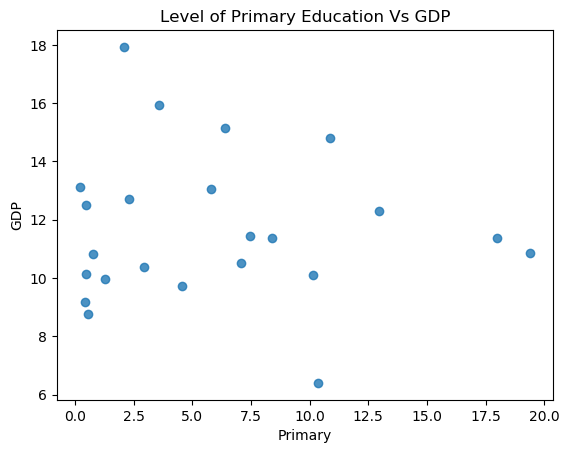

In [94]:
# let us see the scatter plot of these correlations
plt.scatter(x='Primary - 2014-2015', y='GDP',data = Merged,alpha=0.8)
plt.title('Level of Primary Education Vs GDP')
plt.xlabel('Primary')
plt.ylabel('GDP')
plt.show()

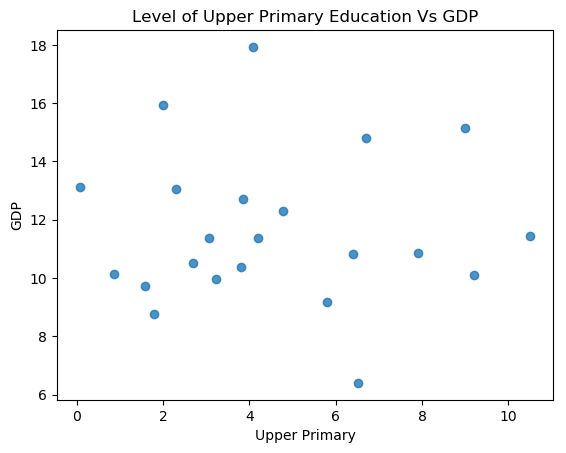

In [97]:
# From the above graph it is saying that there is relatively positive but not strong.
plt.scatter(x='Upper Primary - 2014-2015', y='GDP',data = Merged,alpha=0.8)
plt.title('Level of Upper Primary Education Vs GDP')
plt.xlabel('Upper Primary')
plt.ylabel('GDP')
plt.show()

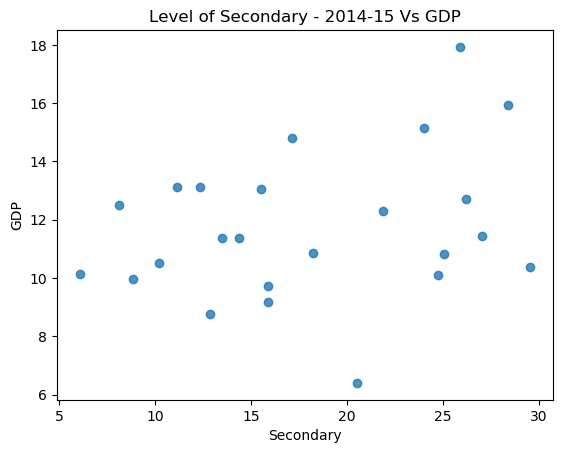

In [98]:
# This seems also be the relatively postivie side for the upper primary education Vs GDP
# From the above graph it is saying that there is relatively positive but not strong.
plt.scatter(x='Secondary - 2014-2015', y='GDP',data = Merged,alpha=0.8)
plt.title('Level of Secondary - 2014-15 Vs GDP')
plt.xlabel('Secondary')
plt.ylabel('GDP')
plt.show()

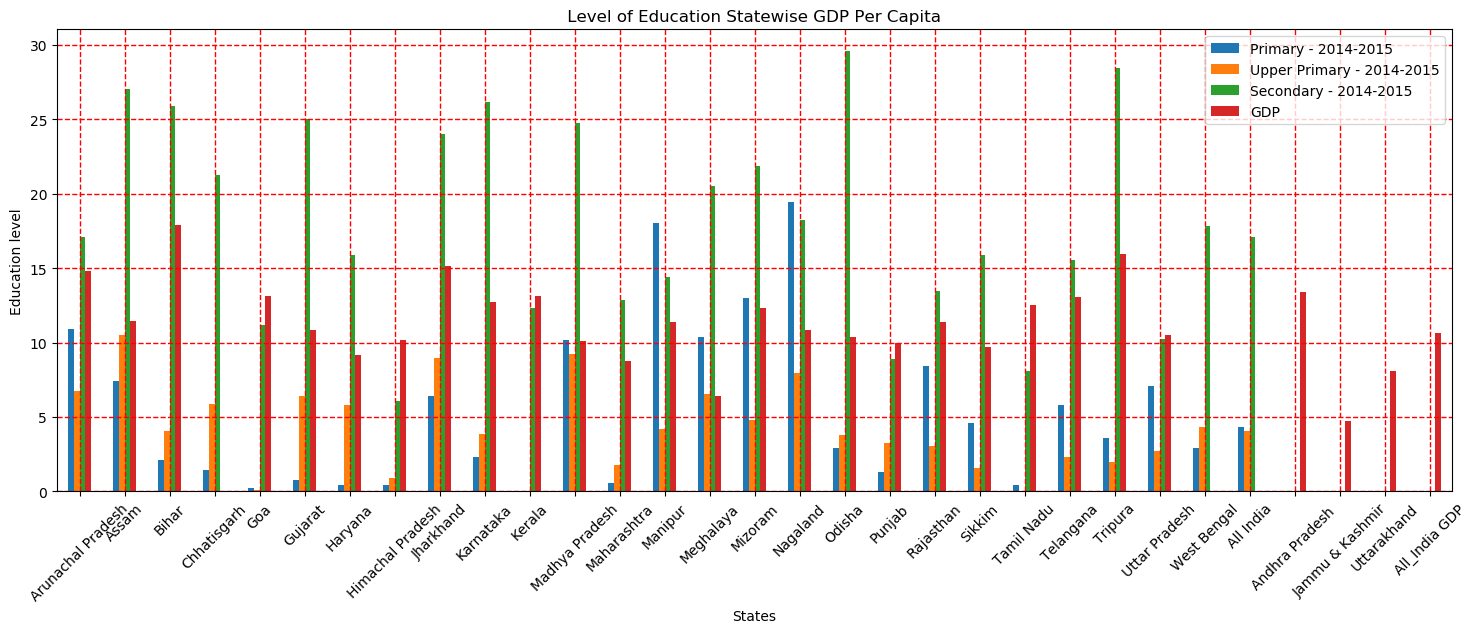

In [115]:
# this seems to be the postive in terms of level of Seconday education.

#Let us see across the states 

Merged.plot.bar(x='States',figsize=(18,6))
# The tile name indicated using the function below

plt.title(" Level of Education Statewise GDP Per Capita ")
plt.xlabel('States')
plt.ylabel('Education level')
plt.xticks(rotation=45)

plt.grid(True, linewidth= 1, linestyle="--",color ="r")
plt.show()


In [ ]:
# The secondary Education level of 2014-15 is high escpcially in Nagaland, then Tripura, andhra pradesh and karnataka, The goverments needs to focus on the primary and upper secondary areas in Educaiton such as Scholarships, more government aided schools and regularise and revisit the existing policy.